In [6]:
import numpy as np
from matplotlib import rcParams
import emcee
import matplotlib.pyplot as plt

## How to sample a multi-dimensional Gaussian

In [ ]:
def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))
    

In [3]:
ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)


In [8]:
log_prob(p0[0], means, cov)

np.float64(-2.596094589085444)

In [5]:
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

Setup sampler

In [7]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

Burn in steps, to settle walkers

In [ ]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

Production run


In [13]:
sampler.run_mcmc(state, 10000)
print("Done!")

Done!


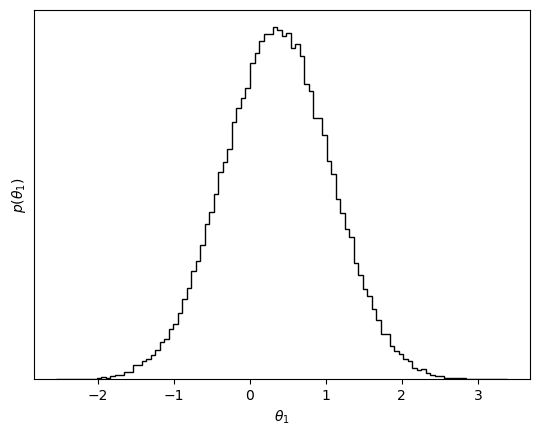

In [14]:
samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);